# Multi-Layer Perceptron
---

The `AutoGrad.nn` Module contains utilities to create some simple *Dense Neural Networks*.

In [20]:
from AutoGrad.engine import Scalar
from AutoGrad.nn import Layer, Neuron, MLP
from AutoGrad.utils import draw_dot

import matplotlib.pyplot as plt
%matplotlib inline

print("Imports Completed")

Imports Completed


## Toy Dataset

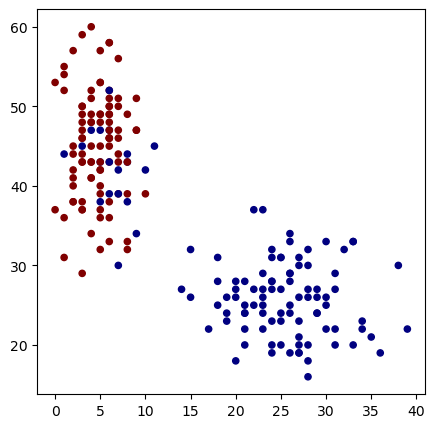

In [35]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(200, 2, n_classes=2, n_labels=1)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y[:, 1], s=20, cmap='jet')

In [36]:
from sklearn.mlp_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y[:,1], test_size=0.2, random_state=42)
len(x_train), len(y_train), len(x_test), len(y_test)

(160, 160, 40, 40)

# `MLP`: Multi-Layer Perceptron
This is the class that implements a Multi-Layer Perceptron.

`MLP(nin : int, nouts : List(int), initializers : List(Callabel), activations : List(str))`

`nin`: Number of inputs

`nouts`: List of nodes in each of the hidden layers and the output layer

`initializers`: List of initializing functions to which a range is to be passed (default: random.uniform) **(optional)**

`activations`: List of strings `"tanh"` and `"relu"` (name of the activation functions). **(optional)**

In [37]:
mlp = MLP(2, [32, 16, 1])
params = mlp.parameters()

mlp

Layer_1 => Inputs: 2 | Units: 32
Layer_2 => Inputs: 32 | Units: 16
Layer_3 => Inputs: 16 | Units: 1

`MLP.parameters()` function returns a list of all the parameters.

A loss function has to be implemented for the purpose of training.

In [81]:
loss = lambda y_test, y_preds : -sum([(y * (p + 0.00001).log()) + ((1 - y)*(1-p + 0.00001).log()) for y, p in zip(y_test, y_preds)])/len(y_test)

y_p = [mlp(x) for x in x_train]
y_p = [(p+1) / 2 for p in y_p]

l = loss(y_test, y_p)
l

Scalar(product = 2.053905566845188 | Grad = 0.0)

The `zero_grad(params)` function is in the `AutoGrad.utils` module.

In [79]:
def zero_grad(params):
    for i in params:
        i.grad = 0.0
    return params

In [82]:
def update(params, lr):
    for i in params:
        i.data -= lr * i.grad
    return params

In [85]:
from tqdm.auto import tqdm

epochs = 100

for i in tqdm(range(epochs)):

    y_preds = [mlp(x) for x in x_train]
    y_preds = [(i+1)/2 for i in y_preds]

    l = loss(y_train, y_preds)
    
    zero_grad(params)

    l.backward()

    update(params, 0.001)

    if (i+1)%10 == 0:
        y_pt = [mlp(x) for x in x_train]
        y_pt = [(i+1)/2 for i in y_pt]
        y_p = [mlp(x) for x in x_test]
        y_p = [(i+1)/2 for i in y_p]
        print(f"Train Loss = {loss(y_train, y_pt)} | Test Loss = {loss(y_test, y_p)}")

 10%|█         | 10/100 [01:17<14:40,  9.79s/it]

Train Loss = Scalar(product = 2.3217054426821173 | Grad = 0.0) | Test Loss = Scalar(product = 2.7414660244931066 | Grad = 0.0)


 20%|██        | 20/100 [02:04<09:02,  6.78s/it]

Train Loss = Scalar(product = 1.5383532586498752 | Grad = 0.0) | Test Loss = Scalar(product = 1.9160577065680457 | Grad = 0.0)


 30%|███       | 30/100 [02:47<06:33,  5.62s/it]

Train Loss = Scalar(product = 0.9483048201140785 | Grad = 0.0) | Test Loss = Scalar(product = 1.2878258386817654 | Grad = 0.0)


 40%|████      | 40/100 [03:38<06:21,  6.37s/it]

Train Loss = Scalar(product = 0.7666352043371307 | Grad = 0.0) | Test Loss = Scalar(product = 1.0080345824839743 | Grad = 0.0)


 50%|█████     | 50/100 [04:42<07:22,  8.85s/it]

Train Loss = Scalar(product = 0.6575631783041602 | Grad = 0.0) | Test Loss = Scalar(product = 0.820281091769037 | Grad = 0.0)


 60%|██████    | 60/100 [05:26<03:25,  5.15s/it]

Train Loss = Scalar(product = 0.5752911945075726 | Grad = 0.0) | Test Loss = Scalar(product = 0.6674016289545142 | Grad = 0.0)


 70%|███████   | 70/100 [06:10<02:39,  5.32s/it]

Train Loss = Scalar(product = 0.513719129671576 | Grad = 0.0) | Test Loss = Scalar(product = 0.5517859408411713 | Grad = 0.0)


 80%|████████  | 80/100 [06:52<01:58,  5.91s/it]

Train Loss = Scalar(product = 0.4675262769319464 | Grad = 0.0) | Test Loss = Scalar(product = 0.45928236871815964 | Grad = 0.0)


 90%|█████████ | 90/100 [07:40<01:10,  7.07s/it]

Train Loss = Scalar(product = 0.4336649581147678 | Grad = 0.0) | Test Loss = Scalar(product = 0.3887913679157327 | Grad = 0.0)


100%|██████████| 100/100 [08:25<00:00,  5.06s/it]

Train Loss = Scalar(product = 0.4075534683197079 | Grad = 0.0) | Test Loss = Scalar(product = 0.3462610313638441 | Grad = 0.0)


In [97]:
y_p = [mlp(x) for x in x_test]
y_p = [((i.data+1)/2)>0.5 for i in y_p]
y_p[:10], y_test[:10]

([False, False, True, False, False, False, False, True, True, False],
 array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0]))